In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape) # 60000
print (x_test.shape)  # 10000

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

print(x_train_noisy.shape, x_test_noisy.shape)
print(type(x_test_noisy))

Visual_x_test = x_test_noisy.numpy()
print(type(Visual_x_test))



(60000, 28, 28, 1, 1)
(60000, 28, 28, 1, 1) (10000, 28, 28, 1, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


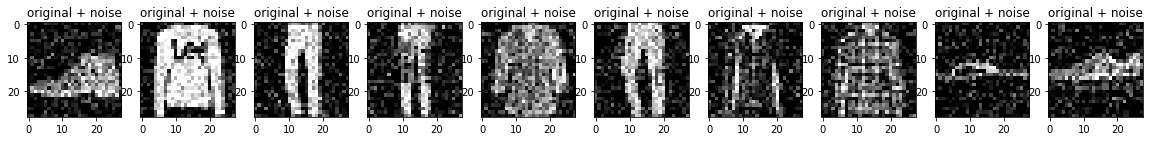

In [7]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(Visual_x_test[i]))
    plt.gray()
plt.show()

In [8]:
x_train = tf.squeeze(x_train)
x_test = tf.squeeze(x_test)

x_train_noisy =tf.squeeze(x_train_noisy)
x_test_noisy = tf.squeeze(x_test_noisy)

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

print(x_train.shape)
print(x_train_noisy.shape, x_test_noisy.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
# Ex 2
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    ### Encoder ### 
    self.encoder = tf.keras.Sequential([layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, kernel_size=3, activation='relu', padding='same', strides=2),
    layers.Conv2D(8, kernel_size=3, activation='relu', padding='same', strides=2)])

    ### Decoder ### 
    
    self.decoder = tf.keras.Sequential([layers.Conv2DTranspose(8, kernel_size=3, activation='relu', padding='same', strides=2),
                                        layers.Conv2DTranspose(16, kernel_size=3, activation='relu', padding='same', strides=2),
                                        layers.Conv2DTranspose(1, kernel_size=3, activation='relu', padding='same')])    

##############################

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train_noisy, x_train, epochs=10, shuffle=True,
                validation_data=(x_test_noisy, x_test))

autoencoder.encoder.summary()
autoencoder.decoder.summary()

encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()



Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0145 - val_loss: 0.0087
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 47s 25m

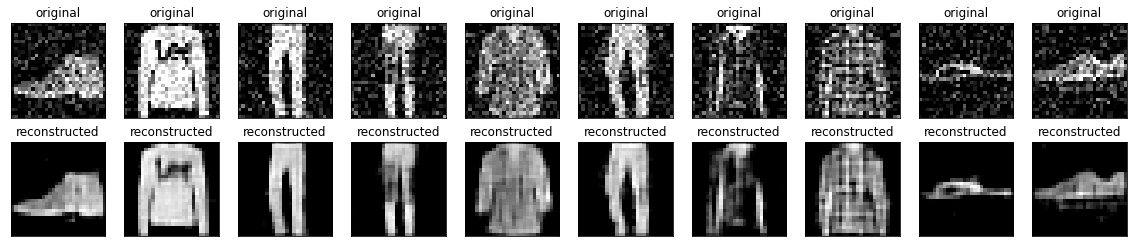

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

